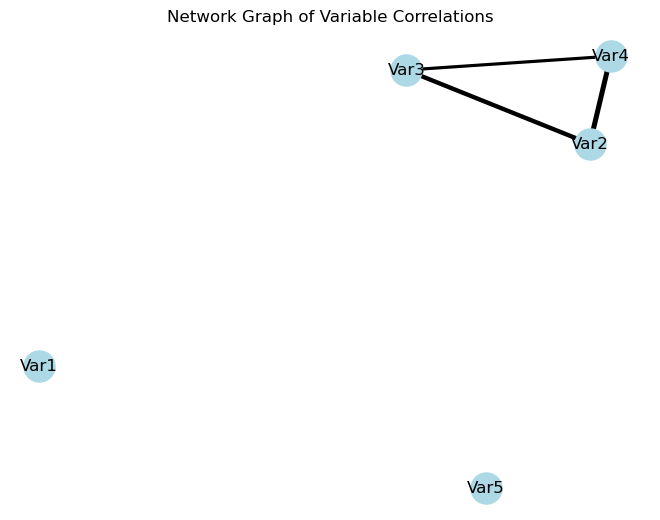

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Generate random data
np.random.seed(42)  # For reproducibility
nrnodes=5
samplesize=1000
mtx = np.eye(N=nrnodes)
mtx[1,3] = 1 
mtx[1,2] = 0.8
data = np.random.randn(samplesize, nrnodes).dot(mtx)  # 100 samples, 5 variables

# Step 2: Compute the correlation matrix
corr_matrix = np.corrcoef(data, rowvar=False)

# Step 3: Create a network graph from the correlation matrix
def create_graph(corr_matrix, threshold=0.1):
    """Creates a graph from a correlation matrix, adding edges only for abs(correlations) > threshold"""
    labels = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5']
    G = nx.Graph()
    for l in labels : 
        G.add_node(l) 
        
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[1]):
            if abs(corr_matrix[i, j]) > threshold:  # Only consider significant correlations
                G.add_edge(labels[i], labels[j], weight=corr_matrix[i, j])
    return G

# Step 4: Plotting the graph
def plot_graph(G):
    pos = nx.spring_layout(G,k=1)  # positions for all nodes
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    edge_widths = [5 * abs(weight) for weight in weights]  # Scale edge widths by correlation strength
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, 
             width=edge_widths)

   # nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in labels.items()})
    plt.title("Network Graph of Variable Correlations")
    plt.show()

graph = create_graph(corr_matrix)
plot_graph(graph)


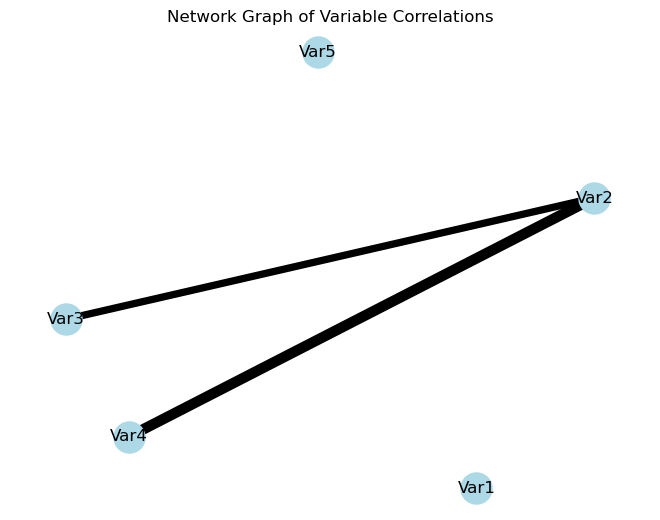

In [30]:
# Step 3: Compute the precision matrix (inverse of the covariance matrix)
try:
    precision_matrix = np.linalg.inv(corr_matrix)
except np.linalg.LinAlgError:
    # If the matrix is singular and cannot be inverted directly, use regularization
    regularization_term = 1e-5  # Small value to add to the diagonal
    regularized_cov_matrix = corr_matrix + np.eye(corr_matrix.shape[0]) * regularization_term
    precision_matrix = np.linalg.inv(regularized_cov_matrix)



# Step 1: Set the diagonal elements of the matrix to zero
no_diagonal = precision_matrix.copy()
np.fill_diagonal(no_diagonal, 0)

# Step 2: Find the maximum absolute value of the off-diagonal entries
max_off_diagonal = np.max(np.abs(no_diagonal))

graph = create_graph(precision_matrix,max_off_diagonal/10)
plot_graph(graph)
